# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import (
    balanced_accuracy_1interval_score,
    mean_absolute_1interval_error,
)

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the tuning of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/adding_data.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [
    make_scorer(balanced_accuracy_1interval_score),
    make_scorer(mean_absolute_1interval_error, greater_is_better=False),
]

X = pd.read_csv("../assets/data/processed/adding_data_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.40057081596854327
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.525333821349088
              precision    recall  f1-score   support

           1       0.53      0.90      0.66       252
           2       0.56      0.92      0.69       252
           3       0.47      0.66      0.55       252
           4       0.43      0.44      0.43       252
           5       0.39      0.34      0.36       252
           6       0.35      0.48      0.40       252
           7       0.30      0.45      0.36       252
           8       0.38      0.35      0.36       252
           9       0.38      0.32      0.35       252
          10       0.32      0.32      0.32       252
          11       0.42      0.29      0.34       252
          12       0.35      0.35      0.35       252
          13       0.37      0.39      0.38       252
          14 

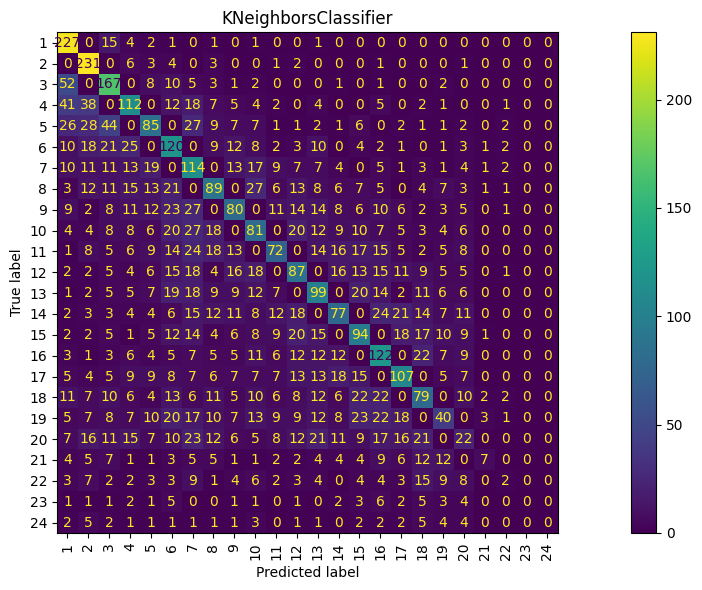

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.36189517553153916
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.718712577669021
              precision    recall  f1-score   support

           1       0.47      0.88      0.62       252
           2       0.59      0.83      0.69       252
           3       0.48      0.52      0.50       252
           4       0.40      0.38      0.39       252
           5       0.36      0.37      0.36       252
           6       0.30      0.48      0.37       252
           7       0.32      0.40      0.35       252
           8       0.33      0.30      0.31       252
           9       0.32      0.29      0.31       252
          10       0.28      0.30      0.29       252
          11       0.36      0.31      0.33       252
          12       0.27      0.33      0.29       252
          13       0.30      0.31      0.31       252
          14 

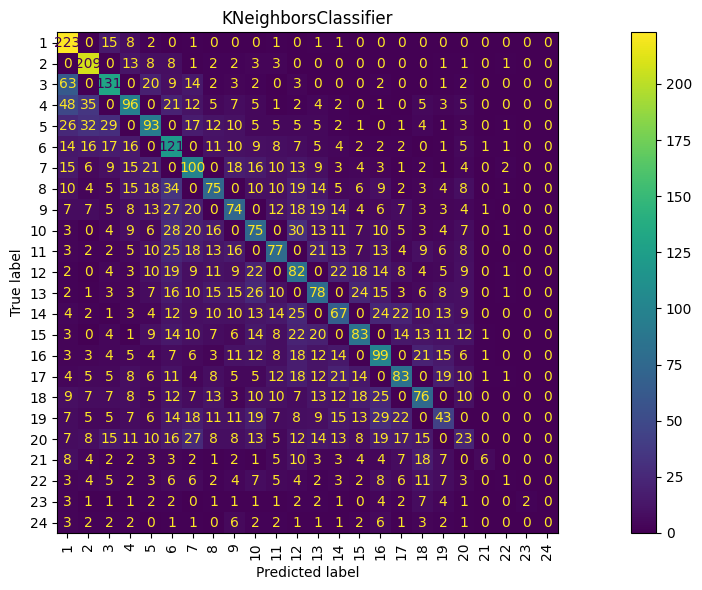

In [4]:
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.358665295142568
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.7116070507569927
              precision    recall  f1-score   support

           1       0.71      0.82      0.76       252
           2       0.66      0.74      0.70       252
           3       0.49      0.68      0.57       252
           4       0.45      0.64      0.53       252
           5       0.37      0.47      0.41       252
           6       0.35      0.45      0.40       252
           7       0.23      0.44      0.30       252
           8       0.41      0.31      0.35       252
           9       0.17      0.18      0.18       252
          10       0.41      0.25      0.31       252
          11       0.17      0.20      0.18       252
          12       0.28      0.30      0.29       252
          13       0.26      0.23      0.24       252
          14       0.35      0.32  

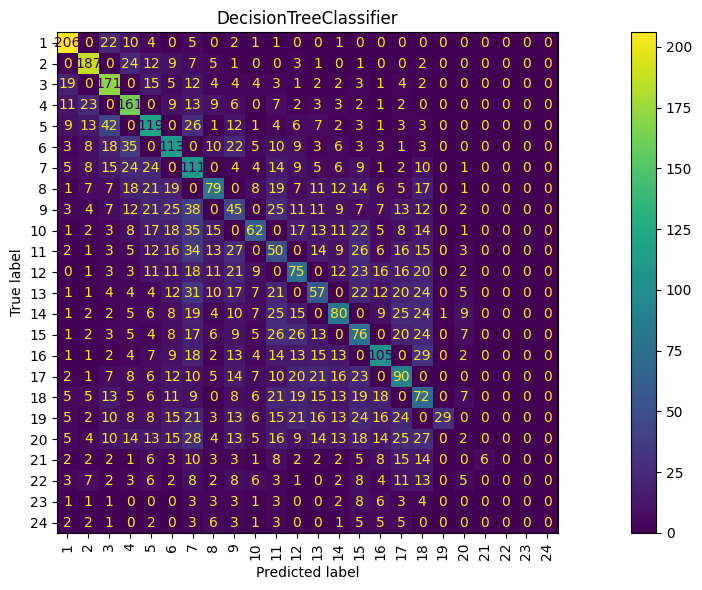

In [5]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "q1",
        "q2",
        "q3",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3546501436274164
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.73978341160123
              precision    recall  f1-score   support

           1       0.71      0.82      0.76       252
           2       0.65      0.73      0.69       252
           3       0.48      0.65      0.55       252
           4       0.44      0.62      0.52       252
           5       0.40      0.46      0.43       252
           6       0.34      0.43      0.38       252
           7       0.24      0.42      0.30       252
           8       0.43      0.31      0.36       252
           9       0.16      0.15      0.15       252
          10       0.41      0.24      0.30       252
          11       0.14      0.20      0.17       252
          12       0.30      0.30      0.30       252
          13       0.23      0.24      0.23       252
          14       0.35      0.33   

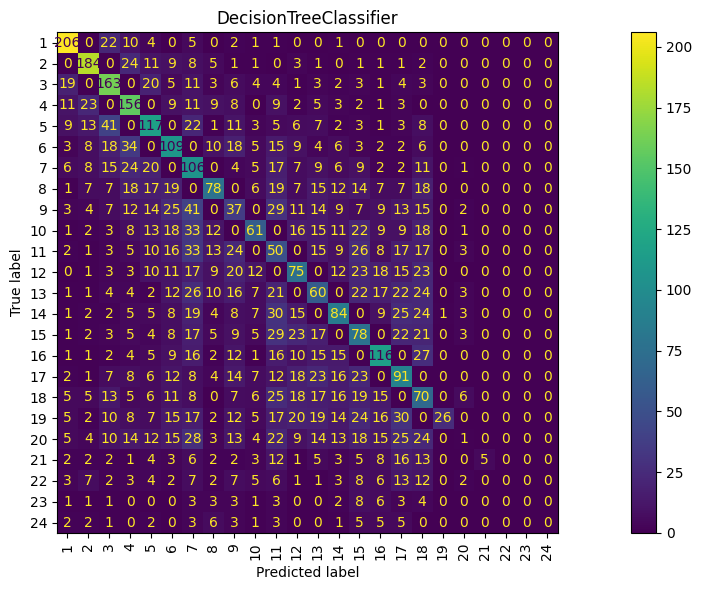

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.46220665277483464
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.1022556643730708
              precision    recall  f1-score   support

           1       0.59      0.93      0.72       252
           2       0.58      0.92      0.71       252
           3       0.50      0.78      0.61       252
           4       0.51      0.64      0.57       252
           5       0.45      0.51      0.48       252
           6       0.45      0.47      0.46       252
           7       0.37      0.45      0.40       252
           8       0.42      0.37      0.39       252
           9       0.37      0.38      0.37       252
          10       0.37      0.37      0.37       252
          11       0.50      0.31      0.38       252
          12       0.32      0.39      0.36       252
          13       0.39      0.45      0.42       252
          14   

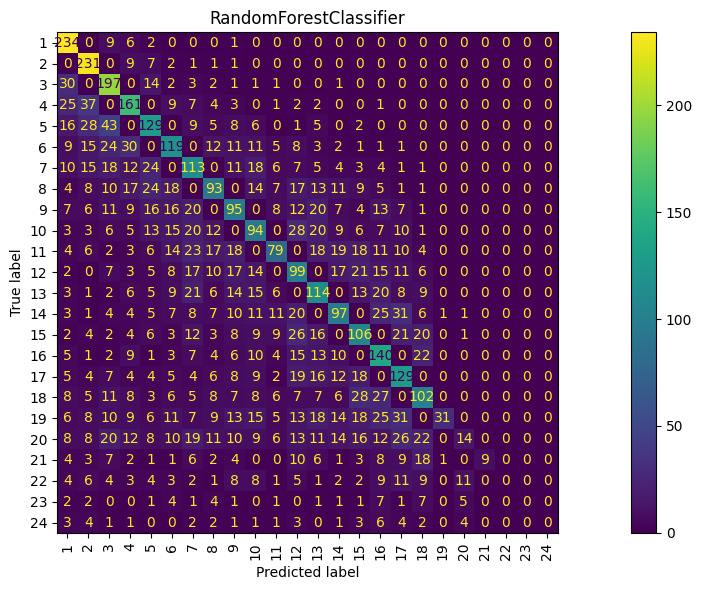

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNationality",
        "constructorNationality",
        "grandPrix",
        "circuitRef",
        "driverWins",
        "constructorWins",
        "q1",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.45484221586494306
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.1260623819942444
              precision    recall  f1-score   support

           1       0.58      0.94      0.72       252
           2       0.57      0.92      0.71       252
           3       0.48      0.74      0.58       252
           4       0.48      0.61      0.54       252
           5       0.48      0.48      0.48       252
           6       0.46      0.48      0.47       252
           7       0.40      0.47      0.44       252
           8       0.47      0.38      0.42       252
           9       0.37      0.40      0.39       252
          10       0.35      0.40      0.37       252
          11       0.53      0.38      0.44       252
          12       0.33      0.42      0.37       252
          13       0.43      0.44      0.43       252
          14   

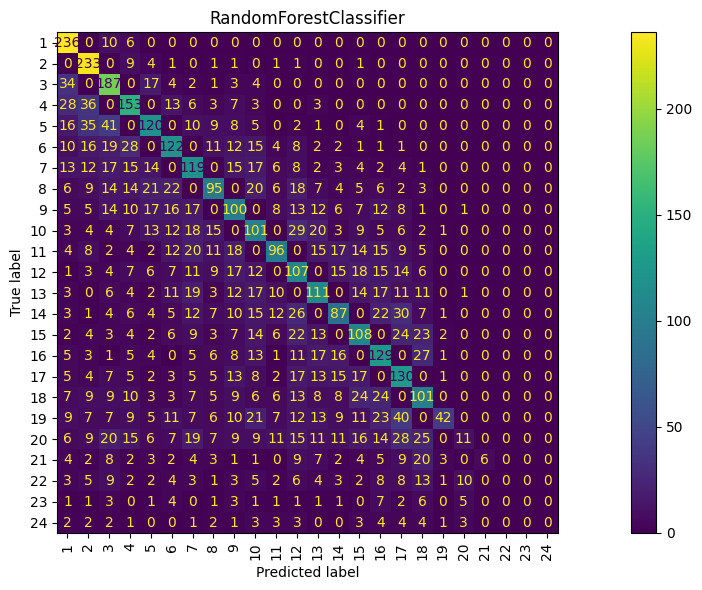

In [8]:
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.41482908926090745
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.974978544061895
              precision    recall  f1-score   support

           1       0.64      0.89      0.74       252
           2       0.64      0.78      0.71       252
           3       0.53      0.55      0.54       252
           4       0.53      0.53      0.53       252
           5       0.39      0.62      0.48       252
           6       0.38      0.56      0.45       252
           7       0.45      0.44      0.45       252
           8       0.34      0.35      0.34       252
           9       0.42      0.36      0.39       252
          10       0.31      0.39      0.35       252
          11       0.31      0.41      0.36       252
          12       0.33      0.46      0.39       252
          13       0.34      0.46      0.39       252


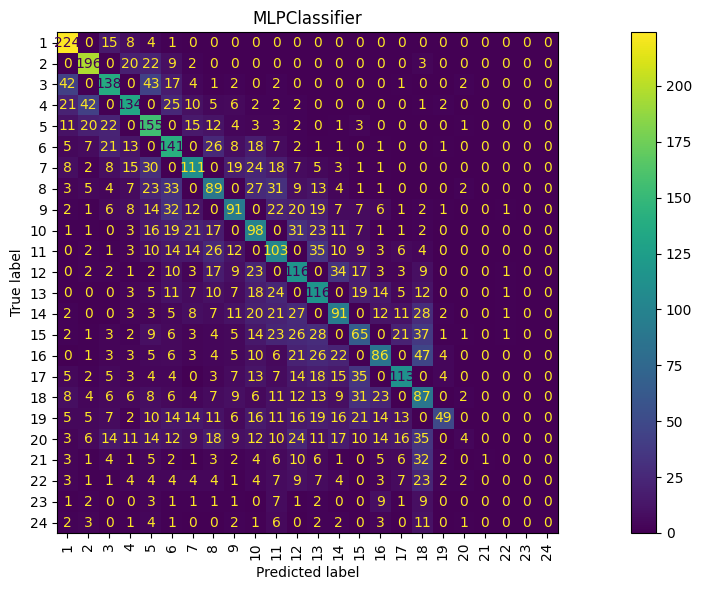

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "circuitRef",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "driverAgeToday",
        "driverAgeAtRace",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.40586672376445104
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.00281021297422
              precision    recall  f1-score   support

           1       0.61      0.87      0.72       252
           2       0.70      0.77      0.73       252
           3       0.55      0.55      0.55       252
           4       0.57      0.53      0.55       252
           5       0.38      0.57      0.46       252
           6       0.36      0.57      0.44       252
           7       0.41      0.40      0.40       252
           8       0.31      0.29      0.30       252
           9       0.42      0.34      0.38       252
          10       0.26      0.38      0.31       252
          11       0.32      0.43      0.37       252
          12       0.30      0.41      0.34       252
          13       0.35      0.42      0.38       252
 

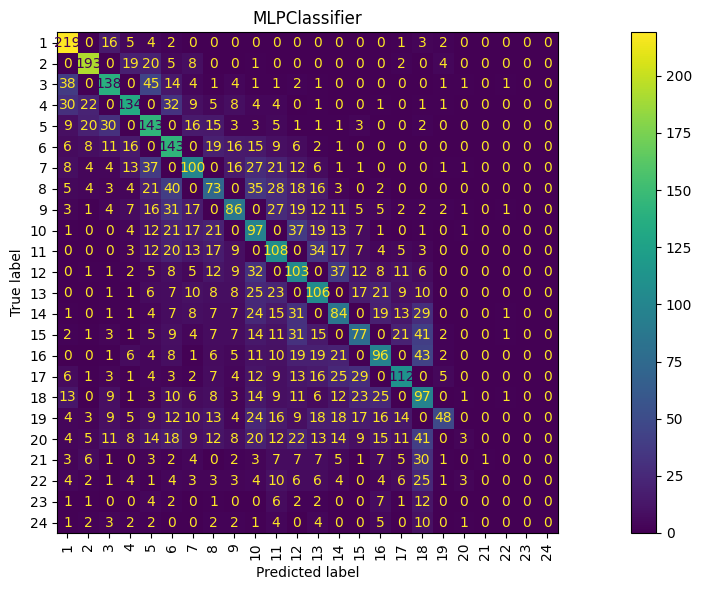

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has improved.

With all attributes, we have improved the performance of the model. Note that we have greatly increased the number of attributes, so here it would be convenient to redo selection and tuning.
